## Data Loading and Cleaning

In [4]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import numpy as np

# Suppress scientific notation globally
np.set_printoptions(suppress=True)

# Pfad zur gespeicherten CSV-Datei
filepath_to_save = "../data/base_df.csv"

# Lade die CSV-Datei
df = pd.read_csv(filepath_to_save)

# Optional: Setze die Anzeige von numerischen Werten, um wissenschaftliches Format zu vermeiden
pd.set_option('display.float_format', '{:.2f}'.format)

# Ausgabe des DataFrame
df

,Unnamed: 0,cTOTEXn,yConnections.N3,yConnections.N4,yConnections.N5,yConnections.N6,yConnections.N7,yConnections.tot,yConnections.streetlights.dir.N7,yConnections.streetlights.N7,...,rUsageHours.injection.N4,rUsageHours.injection.N5,rUsageHours.injection.N6,rUsageHours.injection.N7,rUsageHours.delivered.N3,rUsageHours.delivered.N4,rUsageHours.delivered.N5,rUsageHours.delivered.N6,rUsageHours.delivered.N7,rUsageHours.delivered.tot
0,0,12518828.21,3.00,29.00,481.00,3489.00,14321.00,18323.00,11.00,112.00,...,5246.26,5493.47,5208.40,5478.25,4548.12,5266.84,5515.73,5254.05,5585.18,17507.88
1,1,13683481.37,0.00,0.00,792.00,7186.00,23035.00,31013.00,0.00,536.00,...,0.00,5240.95,5105.87,5106.77,0.00,0.00,5304.47,5184.44,5301.79,10215.11
2,2,12221171.36,0.00,14.00,488.00,4982.00,20258.00,25742.00,0.00,243.00,...,0.00,4516.93,4069.44,5058.62,0.00,0.00,4555.66,4182.36,5217.07,12847.71
3,3,7565416.22,0.00,0.00,314.00,1970.00,17158.00,19442.00,0.00,37.00,...,0.00,5557.09,4961.35,5119.16,0.00,0.00,5570.78,5026.82,5274.07,13089.86
4,4,9376233.04,0.00,42.00,469.00,3451.00,21861.00,25823.00,0.00,175.00,...,0.00,6573.13,4971.78,4611.29,0.00,0.00,6619.81,5047.91,4712.76,15215.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,189,15971572.23,23.00,236.00,307.00,1060.00,505.00,2131.00,0.00,0.00,...,7922.34,7958.19,7647.03,7111.78,7736.95,7964.77,7990.94,7832.05,7279.78,18707.08
190,190,88524836.30,30.00,766.00,2406.00,13554.00,82752.00,99508.00,0.00,960.00,...,5851.38,5923.23,5239.82,5336.80,5958.60,5858.15,5939.41,5306.91,5445.16,21323.03
191,191,11155293.27,0.00,0.00,700.00,3132.00,30653.00,34485.00,0.00,247.00,...,0.00,5257.06,4904.02,5186.31,0.00,0.00,5305.01,4945.43,5404.05,13704.53
192,192,89000544.97,33.00,394.00,3782.00,24962.00,179633.00,208804.00,94.00,353.00,...,4749.30,4930.91,4804.49,4735.90,4793.77,4765.50,4980.94,4850.65,4861.24,20021.75


In [6]:
# Assuming the target column is named 'cTOTEXn' and all other columns are features
X = df.drop(columns=['cTOTEXn'])
y = df['cTOTEXn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Lasso Regression for Feature Selection

In [8]:
import pandas as pd
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("Performing Lasso regression for feature selection...")

# Performing Lasso regression for feature selection
lasso = LassoCV(cv=5, random_state=42, max_iter=10000).fit(X_train, y_train)
selected_features_lasso = np.where(lasso.coef_ != 0)[0]
selected_feature_names_lasso = X.columns[selected_features_lasso]

print(f"Selected features by Lasso ({len(selected_feature_names_lasso)}): {selected_feature_names_lasso}")

# Training the final model with selected features
lr_lasso = LinearRegression()
lr_lasso.fit(X_train.iloc[:, selected_features_lasso], y_train)

print("Predicting on the training and test data (Lasso)...")
# Predicting on the train and test data
y_train_pred_lasso = lr_lasso.predict(X_train.iloc[:, selected_features_lasso])
y_test_pred_lasso = lr_lasso.predict(X_test.iloc[:, selected_features_lasso])

print("Evaluating the model (Lasso)...")
# Evaluating the model on train data
train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
train_rmse_lasso = np.sqrt(train_mse_lasso)
train_mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)
train_r2_lasso = r2_score(y_train, y_train_pred_lasso)

# Evaluating the model on test data
test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
test_rmse_lasso = np.sqrt(test_mse_lasso)
test_mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
test_r2_lasso = r2_score(y_test, y_test_pred_lasso)

# Formatting the results to 4 decimal places
results_lasso_dict = {
    "Model": ["Lasso"] * 8,
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2", 
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [f"{train_mse_lasso:.4f}", f"{train_rmse_lasso:.4f}", f"{train_mae_lasso:.4f}", f"{train_r2_lasso:.4f}", 
              f"{test_mse_lasso:.4f}", f"{test_rmse_lasso:.4f}", f"{test_mae_lasso:.4f}", f"{test_r2_lasso:.4f}"]
}

# Creating DataFrame
results_lasso_df = pd.DataFrame(results_lasso_dict)

results_lasso_df


Performing Lasso regression for feature selection...
Selected features by Lasso (4): Index(['yInjection.tot', 'yInjection.generation.tot', 'yEnergy.delivered.tot',
       'yEnergy.delivered.N1357.sum'],
      dtype='object')
Predicting on the training and test data (Lasso)...
Evaluating the model (Lasso)...


,Model,Metric,Value
0,Lasso,Training MSE,223829559193267.5000
1,Lasso,Training RMSE,14960934.4358
2,Lasso,Training MAE,7591577.6489
3,Lasso,Training R2,0.9866
4,Lasso,Testing MSE,3874778843650319.0000
5,Lasso,Testing RMSE,62247721.5940
6,Lasso,Testing MAE,22623023.3861
7,Lasso,Testing R2,0.9158


## Ridge Regression with Recursive Feature Elimination (RFE) for Feature Selection

In [9]:
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Store the original column names before preprocessing
original_columns = X.columns

print("Performing Ridge regression for feature selection...")

# Create a Ridge model for RFE
ridge = RidgeCV(cv=5)

# Perform RFE to select features
rfe = RFE(estimator=ridge, n_features_to_select=50, step=1)  # You can adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Get selected features
selected_features_ridge = original_columns[rfe.support_]

print(f"Selected features by Ridge with RFE ({len(selected_features_ridge)}): {selected_features_ridge}")

# Training the final model with selected features
lr_ridge = LinearRegression()
lr_ridge.fit(X_train.iloc[:, rfe.support_], y_train)

print("Predicting on the training and test data (Ridge)...")
# Predicting on the train and test data
y_train_pred_ridge = lr_ridge.predict(X_train.iloc[:, rfe.support_])
y_test_pred_ridge = lr_ridge.predict(X_test.iloc[:, rfe.support_])

print("Evaluating the model (Ridge)...")
# Evaluating the model on train data
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)

# Evaluating the model on test data
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(test_mse_ridge)
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

# Formatting the results to 4 decimal places and avoiding scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

results_ridge_dict = {
    "Model": ["Ridge"] * 8,
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2", 
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [train_mse_ridge, train_rmse_ridge, train_mae_ridge, train_r2_ridge, 
              test_mse_ridge, test_rmse_ridge, test_mae_ridge, test_r2_ridge]
}

# Creating DataFrame
ridge_results_df = pd.DataFrame(results_ridge_dict)

ridge_results_df

Performing Ridge regression for feature selection...


C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=1.33327e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=2.10969e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C:\Users\Benedict\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=1.38967e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
C

## Elastic Net with Recursive Feature Elimination (RFE) for Feature Selection

In [39]:
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Store the original column names before preprocessing
original_columns = X.columns

print("Performing Elastic Net regression for feature selection...")

# Create an Elastic Net model for RFE
elastic_net = ElasticNetCV(cv=5, random_state=42)

# Perform RFE to select features
rfe = RFE(estimator=elastic_net, n_features_to_select=50, step=1)  # You can adjust n_features_to_select as needed
rfe.fit(X_train, y_train)

# Get selected features
selected_features_elastic = original_columns[rfe.support_]

print(f"Selected features by Elastic Net with RFE ({len(selected_features_elastic)}): {selected_features_elastic}")

# Training the final model with selected features
lr_elastic = LinearRegression()
lr_elastic.fit(X_train[:, rfe.support_], y_train)

print("Predicting on the training and test data (Elastic Net)...")
# Predicting on the train and test data
y_train_pred_elastic = lr_elastic.predict(X_train[:, rfe.support_])
y_test_pred_elastic = lr_elastic.predict(X_test[:, rfe.support_])

print("Evaluating the model (Elastic Net)...")
# Evaluating the model on train data
train_mse_elastic = mean_squared_error(y_train, y_train_pred_elastic)
train_rmse_elastic = np.sqrt(train_mse_elastic)
train_mae_elastic = mean_absolute_error(y_train, y_train_pred_elastic)
train_r2_elastic = r2_score(y_train, y_train_pred_elastic)

# Evaluating the model on test data
test_mse_elastic = mean_squared_error(y_test, y_test_pred_elastic)
test_rmse_elastic = np.sqrt(test_mse_elastic)
test_mae_elastic = mean_absolute_error(y_test, y_test_pred_elastic)
test_r2_elastic = r2_score(y_test, y_test_pred_elastic)

# Formatting the results to 4 decimal places and avoiding scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

results_elastic_dict = {
    "Model": ["Elastic Net"] * 8,
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2", 
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [train_mse_elastic, train_rmse_elastic, train_mae_elastic, train_r2_elastic, 
              test_mse_elastic, test_rmse_elastic, test_mae_elastic, test_r2_elastic]
}

# Creating DataFrame
elastic_net_results_df = pd.DataFrame(results_elastic_dict)

elastic_net_results_df


Performing Elastic Net regression for feature selection...
Selected features by Elastic Net with RFE (50): Index(['yConnections.N5', 'yInjectionPoints.tot', 'yInjectionPoints.N5to7.sum',
       'yInjectionPoints.dec.sum', 'yInjectionPoints.renewables.tot',
       'yInjectionPoints.renewables.solar.tot', 'yConnections.incl.inj.N5',
       'yConnections.N7.that.are.also.InjectionPoints.N7',
       'yMeters.read.op.N5', 'yMeters.read.N5', 'yMeters.active.N5',
       'yMeters.all.N5', 'yMeters.others.N5', 'yMeters.others.tot',
       'yMeters.noncp.ctrl.excl.house.tot', 'yLines.circuit.N5',
       'yNet.length.N5', 'yTransformers.power.N6',
       'yTransformers.power.own.N6', 'yTransformers.power.own.tot',
       'ySwitchingstations.N7', 'yInstalledPower.N7',
       'yInstalledPower.renewables.solar.tot', 'yInstalledPower.N6to7.sum',
       'yInstalledPower.N5to7.sum', 'yInstalledPower.reducedAPFI.N7',
       'yInstalledPower.renewables.solar.reducedAPFI.tot',
       'yInstalledPower.redu

,Model,Metric,Value
0,Elastic Net,Training MSE,6511005711563.4951
1,Elastic Net,Training RMSE,2551667.2415
2,Elastic Net,Training MAE,1913215.1372
3,Elastic Net,Training R2,0.9996
4,Elastic Net,Testing MSE,5100805703328646.0000
5,Elastic Net,Testing RMSE,71419925.1143
6,Elastic Net,Testing MAE,24057468.7605
7,Elastic Net,Testing R2,0.8891


## Random Forest for Feature Selection

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Store the original column names before preprocessing
original_columns = X.columns

print("Performing Random Forest for feature importance...")

# Performing Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top features based on importance
top_features_count = 50  # Adjust the number of top features to select
selected_features_rf = original_columns[indices[:top_features_count]]

print(f"Selected features by Random Forest ({len(selected_features_rf)}): {selected_features_rf}")

# Training the final model with selected features
lr_rf = LinearRegression()
lr_rf.fit(X_train[:, indices[:top_features_count]], y_train)

print("Predicting on the training and test data (Random Forest)...")
# Predicting on the train and test data
y_train_pred_rf = lr_rf.predict(X_train[:, indices[:top_features_count]])
y_test_pred_rf = lr_rf.predict(X_test[:, indices[:top_features_count]])

print("Evaluating the model (Random Forest)...")
# Evaluating the model on train data
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Evaluating the model on test data
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Formatting the results to 4 decimal places and avoiding scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

results_rf_dict = {
    "Model": ["Random Forest"] * 8,
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2",
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [train_mse_rf, train_rmse_rf, train_mae_rf, train_r2_rf,
              test_mse_rf, test_rmse_rf, test_mae_rf, test_r2_rf]
}

# Creating DataFrame
random_forest_results_df = pd.DataFrame(results_rf_dict)

random_forest_results_df


Performing Random Forest for feature importance...
Selected features by Random Forest (50): Index(['yEnergy.delivered.net.N5to7.sum', 'yEnergy.delivered.N5',
       'yEnergy.delivered.N1357.sum', 'yInjection.N5',
       'yTransformers.power.own.tot', 'yInjection.net.N2to4.sum',
       'yInjection.tot', 'yLines.all.tot', 'yInjection.generation.tot',
       'yEnergy.losses.N5', 'yEnergy.delivered.tot', 'yPeakload.injection.N5',
       'yEnergy.losses.N6', 'yPeakload.abs.nonsim.N4', 'zSoil.aGB0378',
       'yInstalledPower.non.solar.wind.tot', 'yPeakload.4.N5',
       'yPeakload.2.N5', 'yPeakload.5.N5', 'yInstalledPower.reducedAPFI.N5',
       'yTransformers.N6', 'yEnergy.delivered.N4', 'yPeakload.abs.sim.max',
       'yEnergy.losses.N7', 'yEnergy.losses.N4',
       'yPeakload.from.higher.nonsim.N4', 'yMeters.others.N5',
       'yRelativeLowerPower.scaled.corr.N4', 'yEnergy.delivered.net.N2to4.sum',
       'yLines.circuit.tot', 'yPeakload.injection.N4',
       'yPeakload.from.higher.nonsi

,Model,Metric,Value
0,Random Forest,Training MSE,9048729118478.8262
1,Random Forest,Training RMSE,3008110.5562
2,Random Forest,Training MAE,2197043.4468
3,Random Forest,Training R2,0.9995
4,Random Forest,Testing MSE,1519640274080933.2500
5,Random Forest,Testing RMSE,38982563.7187
6,Random Forest,Testing MAE,16074267.0769
7,Random Forest,Testing R2,0.9670


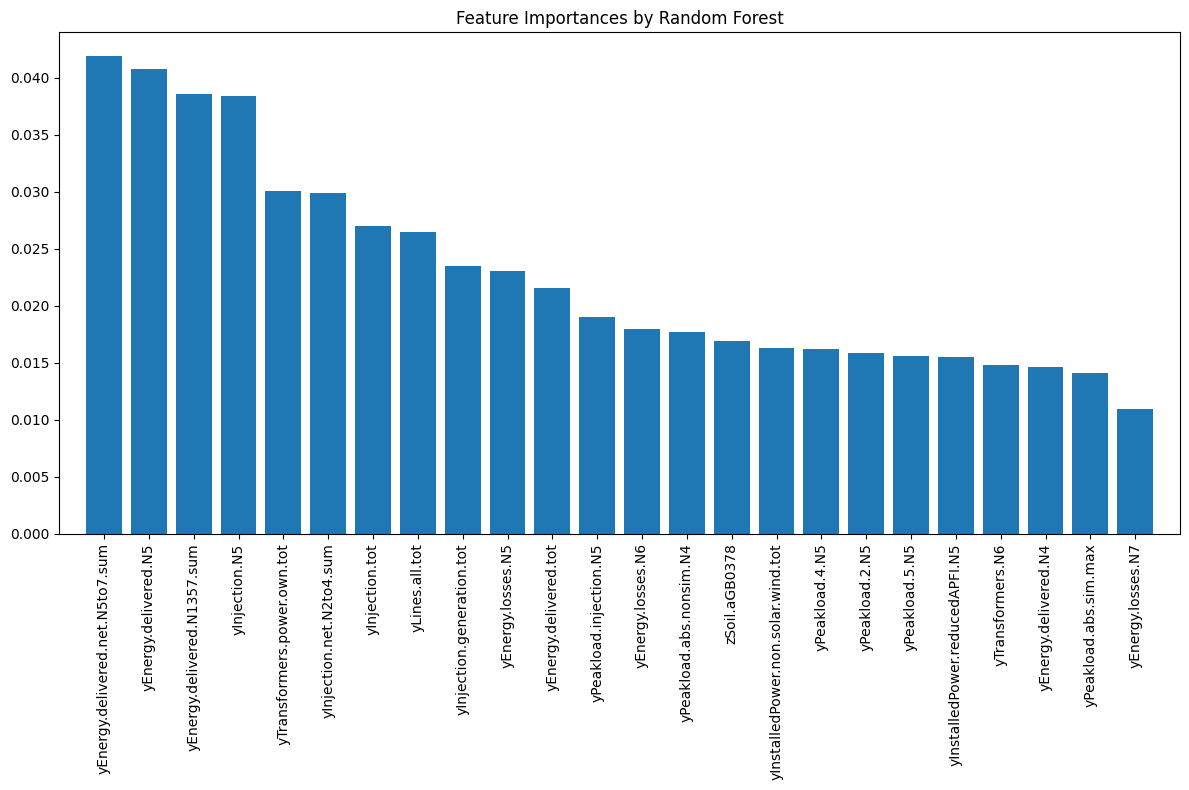

Significant Feature Importances by Random Forest:


,Feature,Importance
0,yEnergy.delivered.net.N5to7.sum,0.0419
1,yEnergy.delivered.N5,0.0408
2,yEnergy.delivered.N1357.sum,0.0386
3,yInjection.N5,0.0384
4,yTransformers.power.own.tot,0.0301
5,yInjection.net.N2to4.sum,0.0299
6,yInjection.tot,0.0270
7,yLines.all.tot,0.0264
8,yInjection.generation.tot,0.0235
9,yEnergy.losses.N5,0.0230


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a threshold for significance
threshold = 0.01

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Store the original column names before preprocessing
original_columns = X.columns

# Map indices back to original column names
feature_names = original_columns[indices]

# Filter significant features
significant_indices = indices[importances[indices] > threshold]
significant_importances = importances[significant_indices]
significant_feature_names = feature_names[importances[indices] > threshold]

# Plot significant feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances by Random Forest")
plt.bar(range(len(significant_indices)), significant_importances, align="center")
plt.xticks(range(len(significant_indices)), significant_feature_names, rotation=90)
plt.xlim([-1, len(significant_indices)])
plt.tight_layout()
plt.show()

# Print significant feature importances
importance_df = pd.DataFrame({
    'Feature': significant_feature_names,
    'Importance': significant_importances
})

print("Significant Feature Importances by Random Forest:")
importance_df


## Summary Table for Comparison

In [46]:
# Convert results dictionaries to list format
results_lasso_list = [
    ["Lasso", metric, value] for metric, value in zip(results_lasso_dict["Metric"], results_lasso_dict["Value"])
]

results_ridge_list = [
    ["Ridge", metric, value] for metric, value in zip(results_ridge_dict["Metric"], results_ridge_dict["Value"])
]

results_elastic_list = [
    ["Elastic Net", metric, value] for metric, value in zip(results_elastic_dict["Metric"], results_elastic_dict["Value"])
]

results_rf_list = [
    ["Random Forest", metric, value] for metric, value in zip(results_rf_dict["Metric"], results_rf_dict["Value"])
]

# Combine all results into a single summary table
results_summary = results_lasso_list + results_ridge_list + results_elastic_list + results_rf_list

# Create a DataFrame for better visualization
df_results_summary = pd.DataFrame(results_summary, columns=["Method", "Metric", "Value"])

# Convert "Value" column to float to ensure proper formatting
df_results_summary["Value"] = df_results_summary["Value"].astype(float)

# Pivot the table for a better comparison format
df_results_pivot = df_results_summary.pivot(index="Metric", columns="Method", values="Value")

# Set display options to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Display the summary table
print("Summary of all methods:")
print(tabulate(df_results_pivot, headers="keys", tablefmt="pipe", floatfmt=".4f"))

# Optionally, save the results to a CSV file
df_results_pivot.to_csv("model_comparison_summary.csv")

df_results_pivot


Summary of all methods:
| Metric        |           Elastic Net |                Lasso |         Random Forest |                Ridge |
|:--------------|----------------------:|---------------------:|----------------------:|---------------------:|
| Testing MAE   |         24057468.7605 |         9253120.7985 |         16074267.0769 |        12762970.0592 |
| Testing MSE   | 5100805703328646.0000 | 312663152418172.4375 | 1519640274080933.2500 | 953343878409448.6250 |
| Testing R2    |                0.8891 |               0.9932 |                0.9670 |               0.9793 |
| Testing RMSE  |         71419925.1143 |        17682283.5748 |         38982563.7187 |        30876267.2357 |
| Training MAE  |          1913215.1372 |         2039836.1491 |          2197043.4468 |         1590683.3775 |
| Training MSE  |    6511005711563.4951 |   8469199006348.0986 |    9048729118478.8262 |   4928015263464.1924 |
| Training R2   |                0.9996 |               0.9995 |                

Method,Elastic Net,Lasso,Random Forest,Ridge
Metric,,,,
Testing MAE,24057468.7605,9253120.7985,16074267.0769,12762970.0592
Testing MSE,5100805703328646.0000,312663152418172.4375,1519640274080933.2500,953343878409448.6250
Testing R2,0.8891,0.9932,0.9670,0.9793
Testing RMSE,71419925.1143,17682283.5748,38982563.7187,30876267.2357
Training MAE,1913215.1372,2039836.1491,2197043.4468,1590683.3775
Training MSE,6511005711563.4951,8469199006348.0986,9048729118478.8262,4928015263464.1924
Training R2,0.9996,0.9995,0.9995,0.9997
Training RMSE,2551667.2415,2910188.8266,3008110.5562,2219913.3459


## Support Vector Regression (SVR)

In [47]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Use the features selected by Random Forest
selected_features_rf = original_columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[:, rf.feature_importances_ > 0.01]
X_test_rf_selected = X_test[:, rf.feature_importances_ > 0.01]

# Define a pipeline with scaling and SVR
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define hyperparameter grid for SVR
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 1, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train_rf_selected, y_train)

# Best model and evaluation
best_svr = grid_search.best_estimator_

print("Best SVR parameters:", grid_search.best_params_)

# Predicting on the train and test data
y_train_pred_svr = best_svr.predict(X_train_rf_selected)
y_test_pred_svr = best_svr.predict(X_test_rf_selected)

print("Evaluating the model (SVR)...")
# Evaluating the model on train data
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_rmse_svr = np.sqrt(train_mse_svr)
train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)

# Evaluating the model on test data
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_rmse_svr = np.sqrt(test_mse_svr)
test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

# Formatting the results to 4 decimal places and avoiding scientific notation
results_svr_dict = {
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2", 
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [train_mse_svr, train_rmse_svr, train_mae_svr, train_r2_svr, 
              test_mse_svr, test_rmse_svr, test_mae_svr, test_r2_svr]
}

# Creating DataFrame
results_svr_df = pd.DataFrame({
    "Model": ["SVR"] * len(results_svr_dict["Metric"]),
    "Metric": results_svr_dict["Metric"],
    "Value": results_svr_dict["Value"]
})

# Printing results for SVR
results_svr_df


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best SVR parameters: {'svr__C': 100, 'svr__epsilon': 0.01, 'svr__kernel': 'poly'}
Evaluating the model (SVR)...


,Model,Metric,Value
0,SVR,Training MSE,18061828214911240.0000
1,SVR,Training RMSE,134394301.2739
2,SVR,Training MAE,46933333.6215
3,SVR,Training R2,-0.0846
4,SVR,Testing MSE,47831969978616192.0000
5,SVR,Testing RMSE,218705212.5090
6,SVR,Testing MAE,80616761.7655
7,SVR,Testing R2,-0.0397


## XGBoost Regression

In [48]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

# Use the features selected by Random Forest
selected_features_rf = original_columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[:, rf.feature_importances_ > 0.01]
X_test_rf_selected = X_test[:, rf.feature_importances_ > 0.01]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_rf_selected)
X_test_scaled = scaler.transform(X_test_rf_selected)

# Define and train the XGBoost model
xgbr = XGBRegressor(n_estimators=100, random_state=42)
xgbr.fit(X_train_scaled, y_train)

# Predicting on the train and test data
y_train_pred_xgbr = xgbr.predict(X_train_scaled)
y_test_pred_xgbr = xgbr.predict(X_test_scaled)

print("Evaluating the model (XGBoost)...")
# Evaluating the model on train data
train_mse_xgbr = mean_squared_error(y_train, y_train_pred_xgbr)
train_rmse_xgbr = np.sqrt(train_mse_xgbr)
train_mae_xgbr = mean_absolute_error(y_train, y_train_pred_xgbr)
train_r2_xgbr = r2_score(y_train, y_train_pred_xgbr)

# Evaluating the model on test data
test_mse_xgbr = mean_squared_error(y_test, y_test_pred_xgbr)
test_rmse_xgbr = np.sqrt(test_mse_xgbr)
test_mae_xgbr = mean_absolute_error(y_test, y_test_pred_xgbr)
test_r2_xgbr = r2_score(y_test, y_test_pred_xgbr)

# Formatting the results to 4 decimal places and avoiding scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

results_xgbr_dict = {
    "Model": ["XGBoost"] * 8,
    "Metric": ["Training MSE", "Training RMSE", "Training MAE", "Training R2", 
               "Testing MSE", "Testing RMSE", "Testing MAE", "Testing R2"],
    "Value": [train_mse_xgbr, train_rmse_xgbr, train_mae_xgbr, train_r2_xgbr, 
              test_mse_xgbr, test_rmse_xgbr, test_mae_xgbr, test_r2_xgbr]
}

# Creating DataFrame
xgbr_results_df = pd.DataFrame(results_xgbr_dict)

xgbr_results_df


Evaluating the model (XGBoost)...


,Model,Metric,Value
0,XGBoost,Training MSE,87529.4743
1,XGBoost,Training RMSE,295.8538
2,XGBoost,Training MAE,196.3493
3,XGBoost,Training R2,1.0000
4,XGBoost,Testing MSE,3693886338807877.5000
5,XGBoost,Testing RMSE,60777350.5412
6,XGBoost,Testing MAE,21184637.9803
7,XGBoost,Testing R2,0.9197


## New Summary Table for All Methods

In [50]:
# Convert the dictionaries to lists
results_lasso_list = [
    ["Lasso", metric, value] for metric, value in zip(results_lasso_dict["Metric"], results_lasso_dict["Value"])
]

results_ridge_list = [
    ["Ridge", metric, value] for metric, value in zip(results_ridge_dict["Metric"], results_ridge_dict["Value"])
]

results_elastic_list = [
    ["Elastic Net", metric, value] for metric, value in zip(results_elastic_dict["Metric"], results_elastic_dict["Value"])
]

results_rf_list = [
    ["Random Forest", metric, value] for metric, value in zip(results_rf_dict["Metric"], results_rf_dict["Value"])
]

results_svr_list = [
    ["SVR", metric, value] for metric, value in zip(results_svr_dict["Metric"], results_svr_dict["Value"])
]

results_xgbr_list = [
    ["XGBoost", metric, value] for metric, value in zip(results_xgbr_dict["Metric"], results_xgbr_dict["Value"])
]

# Combine all results into a single summary table
results_summary = results_lasso_list + results_ridge_list + results_elastic_list + results_rf_list + results_svr_list + results_xgbr_list

# Create a DataFrame for better visualization
df_results_summary = pd.DataFrame(results_summary, columns=["Method", "Metric", "Value"])

# Pivot the table for a better comparison format
df_results_pivot = df_results_summary.pivot(index="Metric", columns="Method", values="Value")

# Reorder the columns from less complex to more complex methods
ordered_columns = ["Lasso", "Ridge", "Elastic Net", "Random Forest", "SVR", "XGBoost"]
df_results_pivot = df_results_pivot[ordered_columns]

print("Summary of all methods:")
print(tabulate(df_results_pivot, headers="keys", tablefmt="pipe", floatfmt=".4f"))

# Optionally, save the results to a CSV file
df_results_pivot.to_csv("model_comparison_summary.csv")

df_results_pivot


Summary of all methods:
| Metric        |                Lasso |                Ridge |           Elastic Net |         Random Forest |                    SVR |               XGBoost |
|:--------------|---------------------:|---------------------:|----------------------:|----------------------:|-----------------------:|----------------------:|
| Testing MAE   |         9253120.7985 |        12762970.0592 |         24057468.7605 |         16074267.0769 |          80616761.7655 |         21184637.9803 |
| Testing MSE   | 312663152418172.4375 | 953343878409448.6250 | 5100805703328646.0000 | 1519640274080933.2500 | 47831969978616192.0000 | 3693886338807877.5000 |
| Testing R2    |               0.9932 |               0.9793 |                0.8891 |                0.9670 |                -0.0397 |                0.9197 |
| Testing RMSE  |        17682283.5748 |        30876267.2357 |         71419925.1143 |         38982563.7187 |         218705212.5090 |         60777350.5412 |
| Training

Method,Lasso,Ridge,Elastic Net,Random Forest,SVR,XGBoost
Metric,,,,,,
Testing MAE,9253120.7985,12762970.0592,24057468.7605,16074267.0769,80616761.7655,21184637.9803
Testing MSE,312663152418172.4375,953343878409448.6250,5100805703328646.0000,1519640274080933.2500,47831969978616192.0000,3693886338807877.5000
Testing R2,0.9932,0.9793,0.8891,0.9670,-0.0397,0.9197
Testing RMSE,17682283.5748,30876267.2357,71419925.1143,38982563.7187,218705212.5090,60777350.5412
Training MAE,2039836.1491,1590683.3775,1913215.1372,2197043.4468,46933333.6215,196.3493
Training MSE,8469199006348.0986,4928015263464.1924,6511005711563.4951,9048729118478.8262,18061828214911240.0000,87529.4743
Training R2,0.9995,0.9997,0.9996,0.9995,-0.0846,1.0000
Training RMSE,2910188.8266,2219913.3459,2551667.2415,3008110.5562,134394301.2739,295.8538


## Data Envelopment Analysis (DEA)

In [50]:
pip install cvxpy

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ------- -------------------------------- 0.2/1.1 MB 4.2 MB/s eta 0:00:01
   ----------------- ---------------------- 0.5/1.1 MB 5.9 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.1 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/736.4 kB ? eta -:--:--
   ------------- -------------------------- 245.8/736.4 kB 5.0 MB/s eta 0:00:01
   --------------------------------- ------ 614.4/736.4 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 736.4/736.4 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.2 kB ? eta -:--:--
   ---------------------------------------- 72.2/72.2 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/293.4 kB ? eta -:--:--
   ------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\Benedict\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpStatus
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, and rf (Random Forest model) are already defined

# Use the features selected by Random Forest
selected_features_rf = original_columns[rf.feature_importances_ > 0.01]
X_train_rf_selected = X_train[:, rf.feature_importances_ > 0.01]
X_test_rf_selected = X_test[:, rf.feature_importances_ > 0.01]

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_rf_selected), columns=selected_features_rf)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_rf_selected), columns=selected_features_rf)

# Prepare data for DEA
input_columns = [col for col in X_train_scaled.columns if not col.startswith('y')]
output_columns = [col for col in X_train_scaled.columns if col.startswith('y')]

data_for_dea_train = X_train_scaled[input_columns + output_columns]
data_for_dea_test = X_test_scaled[input_columns + output_columns]

# Define a function to perform DEA using pulp with adjusted constraints
def perform_dea(data, input_cols, output_cols):
    n = data.shape[0]
    m = len(input_cols)
    s = len(output_cols)
    efficiency_scores = []

    for i in range(n):
        # Define the problem
        prob = LpProblem("DEA", LpMaximize)

        # Define variables
        lambdas = [LpVariable(f"lambda_{j}", lowBound=0) for j in range(n)]
        theta = LpVariable("theta", lowBound=0.01)  # Add lower bound to theta

        # Objective function
        prob += theta

        # Constraints
        for r in range(s):
            prob += lpSum([data.iloc[j, m + r] * lambdas[j] for j in range(n)]) >= data.iloc[i, m + r] - 1e-4, f"Output_{i}_{r}"
        for k in range(m):
            prob += lpSum([data.iloc[j, k] * lambdas[j] for j in range(n)]) <= theta * (data.iloc[i, k] + 1e-4), f"Input_{i}_{k}"

        # Sum of lambdas should be 1 to ensure convexity
        prob += lpSum([lambdas[j] for j in range(n)]) == 1, f"Convexity_{i}"

        # Solve the problem
        prob.solve()

        # Debugging: Check the status and theta value
        print(f"DMU {i}, Status: {LpStatus[prob.status]}, Theta: {theta.value() if theta.value() is not None else 'None'}")

        # Check if the problem is solved and theta is non-zero
        if LpStatus[prob.status] == 'Optimal' and theta.value() is not None and theta.value() > 0.01:
            efficiency_scores.append(1 / theta.value())
        else:
            efficiency_scores.append(float('inf'))  # Assign infinity if no feasible solution is found

    return efficiency_scores

print("Solving DEA problem for training data...")
# Solve DEA problem for training data
efficiency_scores_train = perform_dea(data_for_dea_train, input_columns, output_columns)

# Output results
results_train = pd.DataFrame({
    'DMU': data_for_dea_train.index,
    'Efficiency': efficiency_scores_train
})

# Print results for training data
print("DEA Efficiency Scores for Training Data:")
print(results_train)

print("Solving DEA problem for test data...")
# Solve DEA problem for test data
efficiency_scores_test = perform_dea(data_for_dea_test, input_columns, output_columns)

# Output results for test data
results_test = pd.DataFrame({
    'DMU': data_for_dea_test.index,
    'Efficiency': efficiency_scores_test
})

# Print results for test data
print("DEA Efficiency Scores for Test Data:")
print(results_test)

# Combining results
results_combined = pd.concat([results_train, results_test], keys=['Train', 'Test']).reset_index(level=0).rename(columns={'level_0': 'Dataset'})

# Displaying combined results
print("DEA Efficiency Scores Combined:")
print(results_combined)

# Optionally, save the results to a CSV file
results_combined.to_csv("dea_efficiency_scores.csv", index=False)


Solving DEA problem for training data...
DMU 0, Status: Optimal, Theta: 1.0340146
DMU 1, Status: Unbounded, Theta: 0.0
DMU 2, Status: Unbounded, Theta: 0.0
DMU 3, Status: Optimal, Theta: 1.0193449
DMU 4, Status: Optimal, Theta: 1.0003542
DMU 5, Status: Optimal, Theta: 1.049873
DMU 6, Status: Optimal, Theta: 1.217497
DMU 7, Status: Optimal, Theta: 1.0023058
DMU 8, Status: Optimal, Theta: 1.0003546
DMU 9, Status: Optimal, Theta: 1.0032953
DMU 10, Status: Optimal, Theta: 1.0018886
DMU 11, Status: Unbounded, Theta: 0.0
DMU 12, Status: Optimal, Theta: 1.0495718
DMU 13, Status: Optimal, Theta: 1.0154937
DMU 14, Status: Optimal, Theta: 1.0611002
DMU 15, Status: Optimal, Theta: 1.150901
DMU 16, Status: Unbounded, Theta: 0.0
DMU 17, Status: Optimal, Theta: 1.0078723
DMU 18, Status: Optimal, Theta: 1.1992606
DMU 19, Status: Optimal, Theta: 1.490262
DMU 20, Status: Optimal, Theta: 1.0020129
DMU 21, Status: Optimal, Theta: 1.0246723
DMU 22, Status: Optimal, Theta: 1.0791758
DMU 23, Status: Optimal